In [3]:
import pandas as pd

In [4]:

df = pd.read_csv('our-bma.csv')


In [5]:
df


,Refs,Reads
0,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
1,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...
2,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...
3,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
4,CATTGGAGACTTCTAGCCGTGTCAGATTTTGGGATGAGCATTTGGT...,CATTGGAGACTTCTAGCCGTGTCAGATTTTGGGATGAGCATTTGGT...
...,...,...
8972,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
8973,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
8974,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
8975,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [6]:
from tqdm import tqdm


In [7]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [8]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [9]:
import difflib


In [10]:
def print_diff(ref_strand, recons_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = recons_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


In [11]:
# AGCT
# TAGC

# SM: (0, _ -> T), (4, _ -> T)
# Prof: (0, 1, 2, 3)

count_pos = [0] * 5
def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1
print_diff2("AGCT", "TAGC")
print(count_pos)

ref_strand = "AGCT"
recons_strand = "TAGC"
a = 0
b = 0
for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
    was = ref_strand[a:match.a]
    now = recons_strand[b:match.b]

    a = match.a + match.size
    b = match.b + match.size

    print(match, was, now, match.a)


    if was == '' and now == '':
        pass
    else:
        pass
        # print('{}|{}'.format(was, now), end=', ')
        # pairs += [(was, now, match.a)]
        # pairs_no_pos += [(was, now)]


[1, 1, 1, 1, 0]
Match(a=0, b=1, size=3)  T 0
Match(a=4, b=4, size=0) T  4


100%|██████████| 8977/8977 [00:00<00:00, 237953.08it/s]


[26, 44, 49, 75, 78, 93, 119, 125, 148, 161, 174, 188, 213, 227, 274, 275, 304, 312, 331, 345, 351, 361, 379, 397, 407, 425, 452, 445, 491, 485, 514, 542, 552, 571, 613, 608, 644, 634, 680, 691, 709, 695, 749, 758, 776, 808, 827, 837, 863, 873, 923, 899, 907, 927, 1075, 1056, 1011, 1024, 982, 955, 973, 944, 923, 907, 875, 839, 829, 812, 800, 749, 767, 739, 708, 695, 713, 672, 660, 637, 631, 577, 592, 577, 540, 527, 520, 492, 479, 415, 429, 373, 400, 347, 353, 305, 310, 276, 259, 234, 224, 190, 181, 175, 152, 116, 98, 78, 73, 53, 12, 8, 0]


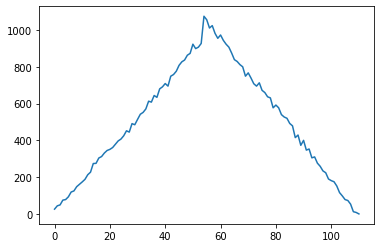

In [12]:
strand_len = 110
count_pos = [0] * (strand_len + 1)

def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff2(ref_strands[i], noisy_strands[i])

import matplotlib.pyplot as plt
plt.plot(range(strand_len + 1), count_pos)
print(count_pos)


In [13]:
import numpy as np


In [14]:
pairs = []
pairs_no_pos = []
for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])

100%|██████████| 8977/8977 [00:02<00:00, 3332.92it/s]


In [15]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [16]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

C -> AA 7
T -> AA 7
C -> AT 7
T -> GG 8
TT ->  8
TA ->  9
G -> AA 9
CA ->  10
C -> GG 10
AT ->  10
GA ->  11
C -> TT 11
GT ->  12
A -> GG 13
TG ->  13
AC ->  16
CG ->  18
 -> TT 20
 -> TC 20
 -> GT 22
 -> TA 22
GC ->  22
A -> C 23
 -> CT 23
TC ->  24
 -> CC 24
 -> CG 26
 -> AC 26
G -> C 26
 -> AA 27
AG ->  27
 -> TG 30
 -> CA 31
A -> T 32
 -> AG 32
GG ->  33
 -> GG 33
 -> GC 34
CT ->  37
 -> AT 37
 -> GA 40
CC ->  47
G -> T 48
T -> C 84
T -> A 101
C -> G 105
T -> G 110
A -> G 120
G -> A 123
C -> A 138
C -> T 300
A ->  366
 -> C 442
 -> T 481
T ->  485
 -> A 487
 -> G 489
G ->  611
C ->  1031


In [17]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [18]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


G ->  @ 37 6
C ->  @ 108 6
C ->  @ 16 6
G ->  @ 3 6
G ->  @ 46 6
G ->  @ 49 6
G ->  @ 48 6
G ->  @ 41 6
G ->  @ 23 6
G ->  @ 16 6
 -> C @ 56 6
T ->  @ 64 6
T ->  @ 35 6
T ->  @ 58 6
C ->  @ 48 6
T ->  @ 51 6
T ->  @ 50 6
C ->  @ 23 6
C ->  @ 83 6
C -> T @ 72 6
C ->  @ 69 6
C ->  @ 56 6
A ->  @ 44 6
C -> T @ 69 6
A ->  @ 48 6
C -> T @ 68 6
A ->  @ 53 6
C -> T @ 59 6
T ->  @ 60 6
C -> T @ 64 6
T ->  @ 63 6
T ->  @ 77 6
G ->  @ 12 6
G ->  @ 7 6
G ->  @ 8 6
A ->  @ 86 6
G ->  @ 87 6
G ->  @ 9 6
G ->  @ 91 6
T ->  @ 66 6
G ->  @ 103 6
A ->  @ 92 6
 -> TG @ 55 6
C -> T @ 1 6
A ->  @ 78 6
C -> T @ 103 6
T ->  @ 95 6
G ->  @ 96 6
 -> AG @ 55 6
C ->  @ 81 7
C ->  @ 21 7
C ->  @ 59 7
 -> AC @ 55 7
C ->  @ 93 7
C ->  @ 49 7
C ->  @ 14 7
C ->  @ 17 7
C ->  @ 38 7
C ->  @ 30 7
 -> AT @ 53 7
C ->  @ 72 7
G ->  @ 18 7
C -> T @ 36 7
A ->  @ 47 7
G ->  @ 102 7
G ->  @ 33 7
G ->  @ 86 7
G ->  @ 30 7
T ->  @ 103 7
G ->  @ 42 7
 -> CA @ 53 7
G ->  @ 79 7
A ->  @ 56 7
 -> G @ 56 7
GG ->  @ 110 7
G ->  @ 45

In [19]:
import matplotlib.pyplot as plt

In [20]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[12, 69, 32, 23, 32, 30, 29, 33, 32, 34, 32, 38, 36, 36, 39, 28, 27, 37, 25, 36, 50, 31, 29, 40, 32, 29, 26, 22, 23, 34, 32, 49, 36, 28, 50, 48, 39, 42, 39, 41, 45, 33, 43, 42, 50, 47, 41, 49, 62, 49, 44, 76, 141, 324, 1495, 359, 125, 74, 60, 39, 43, 40, 37, 56, 63, 50, 42, 43, 51, 46, 40, 42, 41, 42, 39, 48, 46, 42, 51, 41, 37, 32, 31, 24, 28, 37, 46, 45, 40, 57, 30, 41, 48, 40, 48, 40, 41, 34, 38, 45, 30, 34, 38, 45, 39, 31, 35, 38, 27, 19, 88]


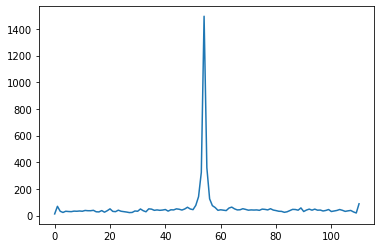

In [21]:
plt.plot(range(strand_len + 1), pos_counts)

In [22]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[8, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, 1, 2, 4, 13, 45, 289, 44, 13, 2, 1, 3, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 3, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2]


In [23]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


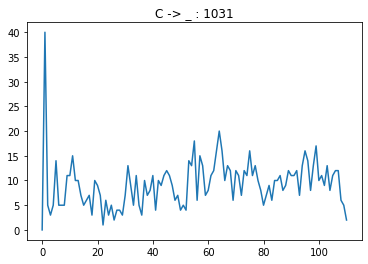

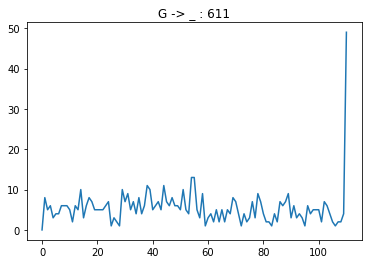

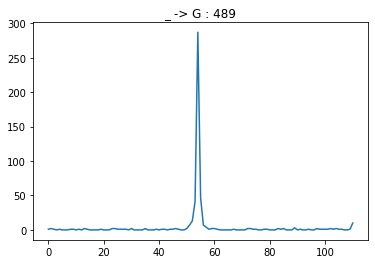

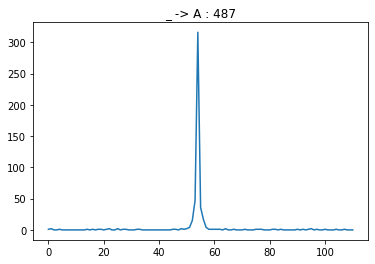

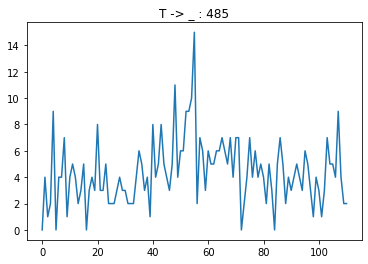

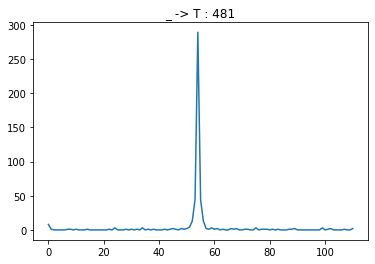

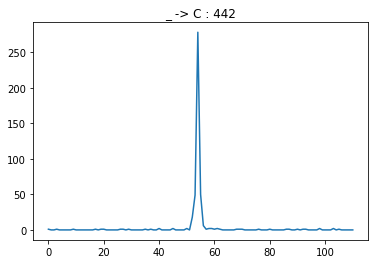

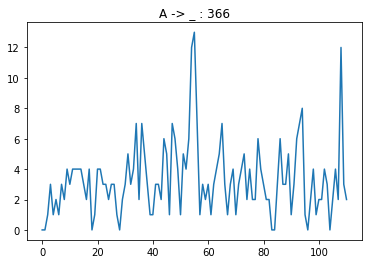

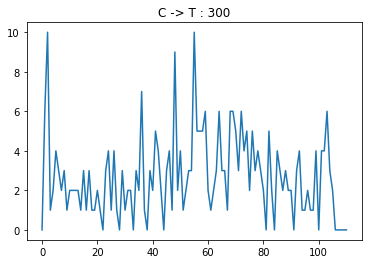

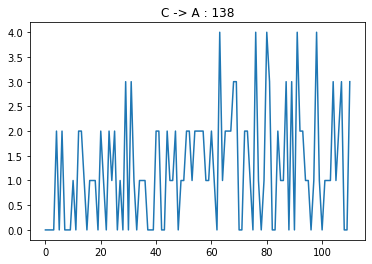

In [24]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [25]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)